#### Data preprocessing

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing
train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)
df_train['cleaned_text'] = df_train['text'].apply(preprocess_text)

# Split data into features and labels
X = df_train['cleaned_text']
y = df_train['label']


#### TF-IDF

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=20000)
X_tfidf = vectorizer.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
X_tfidf.size

Learn TF-IDF

In [ ]:
# Step 1: Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Prepare the text data
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sun in the sky is bright.",
    "We can see the shining sun, the bright sun."
]

# Step 3: Initialize and fit the TfidfVectorizer
#vectorizer = TfidfVectorizer()

# Step 3: Initialize and fit the TfidfVectorizer with stop_words and max_features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5)

# Step 4: Transform the text data into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(documents)

# Step 5: Explore the resulting TF-IDF matrix
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense matrix and display it
dense_tfidf = tfidf_matrix.todense()

# Create a DataFrame to see the values in a tabular format
import pandas as pd
df = pd.DataFrame(dense_tfidf, columns=feature_names)

print(df)

In [ ]:
dense_tfidf.shape

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)
df_train['cleaned_text'] = df_train['text'].apply(preprocess_text)

# Split data into features and labels
X = df_train['cleaned_text']
y = df_train['label']

#### BoW Sequences

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to tokenize and pad sequences
def tokenize_and_pad_sequences(X_tokens, max_vocab_size=20000, max_sequence_length=None):
    # Convert tokens to text for tokenizer
    texts = [' '.join(tokens) for tokens in X_tokens]
    
    # Initialize tokenizer
    tokenizer = Tokenizer(num_words=max_vocab_size)
    tokenizer.fit_on_texts(texts)
    
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(texts)
    
    # Determine maximum sequence length
    max_length = max(len(seq) for seq in sequences)
    if max_sequence_length is None:
        max_sequence_length = max_length
    else:
        max_sequence_length = min(max_sequence_length, max_length)
    
    # Print word counts and vocabulary size
    print(f"Word Counts: {tokenizer.word_counts}\n")
    print(f"Word Index: {tokenizer.word_index}\nVocabulary Size: {len(tokenizer.word_index)}\n")
    
    # Print example of tokenization
    print(f"Example of Original Tokens:\n{X_tokens[0]}\n")
    print(f"Example of Tokenized Sequence:\n{sequences[0]}\n")
    
    # Print maximum sequence length
    print(f"Maximum sequence length in the dataset: {max_length}\n")
    
    # Pad sequences
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
    
    # Print example of padded sequence
    print(f"Example of Padded Sequence:\n{padded_sequences[0]}\nLength: {len(padded_sequences[0])}\n")
    
    return padded_sequences, tokenizer

# Example usage:
train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

# Apply the preprocessing function
df_train[['tokens', 'text']] = df_train['text'].apply(lambda x: pd.Series(preprocess_text(x)))

# Split data into features and labels
X_tokens = df_train['tokens']
y = df_train['label']

# Tokenize and pad sequences
max_vocab_size = 20000
max_sequence_length = None  # Set to None to dynamically determine based on data

padded_sequences, tokenizer = tokenize_and_pad_sequences(X_tokens, max_vocab_size, max_sequence_length)

# Split into training and validation sets
X_train_padded, X_val_padded, y_train, y_val = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


In [ ]:
tokenizer.word_index['stuning'], tokenizer.word_index['even']

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to create vocabulary and sequences
def create_vocab_and_sequences(X_tokens):
    # Create vocabulary set
    vocab = set()
    for tokens in X_tokens:
        vocab.update(tokens)
    
    # Create a mapping from word to index
    word_index = {word: idx + 1 for idx, word in enumerate(vocab)}  # +1 to reserve 0 for padding
    
    # Convert tokens to sequences
    sequences = [[word_index[word] for word in tokens] for tokens in X_tokens]
    
    return sequences, word_index

# Example usage:
train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

# Apply the preprocessing function
df_train[['tokens', 'text']] = df_train['text'].apply(lambda x: pd.Series(preprocess_text(x)))

# Split data into features and labels
X_tokens = df_train['tokens']
y = df_train['label']

# Create vocabulary and sequences
sequences, word_index = create_vocab_and_sequences(X_tokens)

# Determine maximum sequence length
max_length = max(len(seq) for seq in sequences)

# Pad sequences
max_sequence_length = max_length  # Or set to a fixed value if desired
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Print vocabulary and sequences
print(f"Vocabulary Size: {len(word_index)}\n")
print(f"Word Index: {word_index}\n")
print(f"Example of Original Tokens:\n{X_tokens[0]}\n")
print(f"Example of Tokenized Sequence:\n{sequences[0]}\n")
print(f"Example of Padded Sequence:\n{padded_sequences[0]}\nLength: {len(padded_sequences[0])}\n")

# Split into training and validation sets
X_train_padded, X_val_padded, y_train, y_val = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


In [ ]:
word_index['stuning']

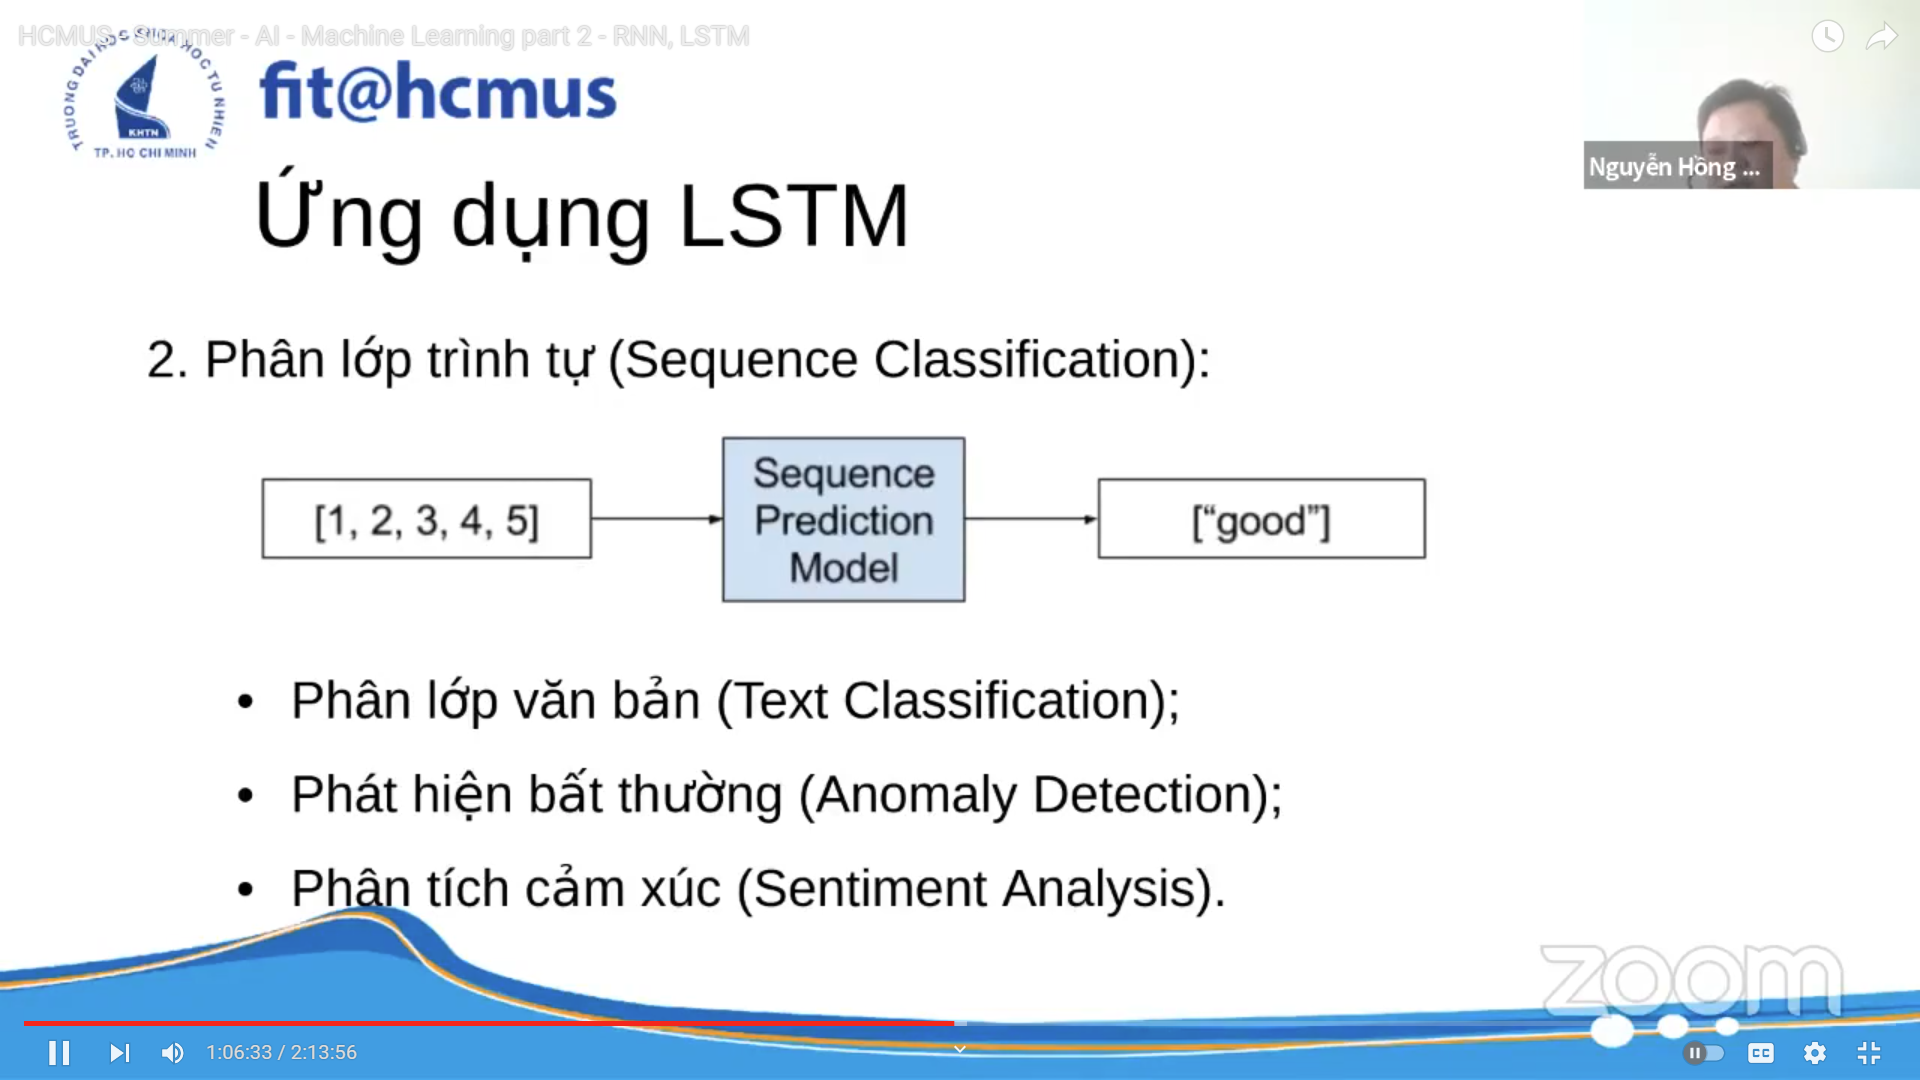

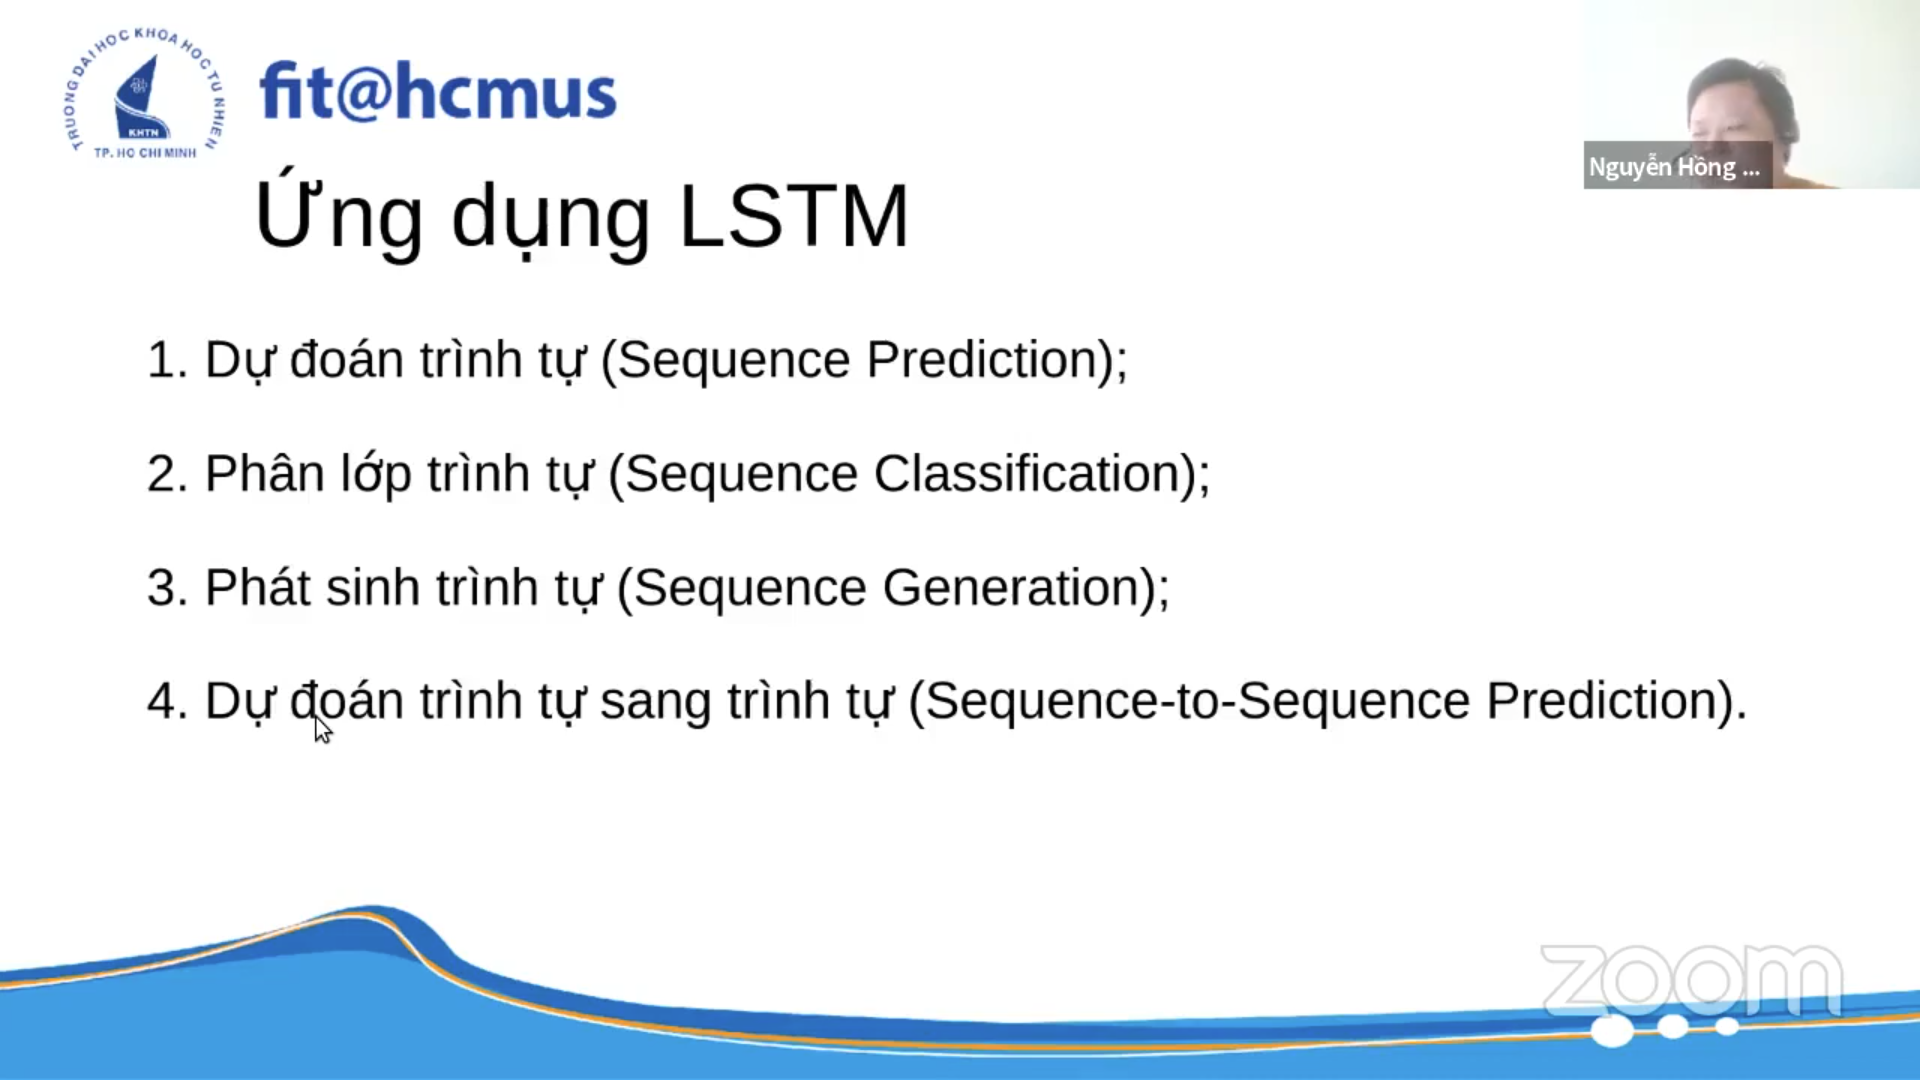

#### Test 3 + Custom Tokenizer

In [ ]:
import numpy as np
import re
from collections import defaultdict

class Tokenizer:
    def __init__(self, num_words=None):
        self.num_words = num_words
        self.word_index = {}
        self.index_word = {}
        self.word_counts = defaultdict(int)
        self.oov_token = "<OOV>"

    def fit_on_texts(self, texts):
        for text in texts:
            words = self._tokenize(text)
            for word in words:
                self.word_counts[word] += 1

        # Sort words by frequency
        sorted_words = sorted(self.word_counts.items(), key=lambda item: item[1], reverse=True)
        
        # Create word index
        self.word_index = {self.oov_token: 1}
        self.index_word = {1: self.oov_token}
        for idx, (word, count) in enumerate(sorted_words):
            if self.num_words and idx + 2 >= self.num_words:
                break
            self.word_index[word] = idx + 2  # +2 because 0 is reserved for padding and 1 for OOV
            self.index_word[idx + 2] = word

    def texts_to_sequences(self, texts):
        sequences = []
        for text in texts:
            words = self._tokenize(text)
            sequence = [self.word_index.get(word, 1) for word in words]  # 1 is the index for OOV
            sequences.append(sequence)
        return sequences

    def _tokenize(self, text):
        text = text.lower()
        text = re.sub(r'[\W_]+', ' ', text)
        tokens = text.split()
        return tokens

def pad_sequences(sequences, maxlen, padding='post'):
    padded_sequences = np.zeros((len(sequences), maxlen), dtype=int)
    for i, sequence in enumerate(sequences):
        if len(sequence) > maxlen:
            if padding == 'post':
                padded_sequences[i] = sequence[:maxlen]
            else:
                padded_sequences[i] = sequence[-maxlen:]
        else:
            if padding == 'post':
                padded_sequences[i, :len(sequence)] = sequence
            else:
                padded_sequences[i, -len(sequence):] = sequence
    return padded_sequences

# Example usage
tokenizer = Tokenizer(num_words=20000)

1. Preprocessing

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download("stopwords")
nltk.download("wordnet")

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_vocab_size = 20000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_sequence_length)

2. Define the RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 100

model = Sequential()
model.add(
    Embedding(
        input_dim=max_vocab_size,
        output_dim=embedding_dim,
        input_length=max_sequence_length,
    )
)
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

3. Train the Model

In [ ]:
batch_size = 32
epochs = 10

history = model.fit(
    X_train_padded,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_padded, y_val),
)

4. Evaluate the Model

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_padded, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Predict on new data
new_texts = ["This product is great!", "I did not like this book at all."]
new_texts_preprocessed = [preprocess_text(text) for text in new_texts]
new_texts_sequences = tokenizer.texts_to_sequences(new_texts_preprocessed)
new_texts_padded = pad_sequences(new_texts_sequences, maxlen=max_sequence_length)

predictions = model.predict(new_texts_padded)
print(predictions)

#### Test2

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Download necessary NLTK data
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")


# Function to preprocess data from text file
def preprocess_data_from_file(filepath):
    with open(filepath, "r") as file:
        data = file.read()
    lines = data.strip().split("\n")
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(" ", 1)
        label = int(label.split("__label__")[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({"label": labels, "text": texts})


# Load training data from file
train_filepath = "train.3270.txt"
df_train = preprocess_data_from_file(train_filepath)

# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def preprocess_text(text, method="lemmatize"):
    # Lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r"\W", " ", text)
    text = re.sub(r"\s+", " ", text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming or Lemmatization
    if method == "stem":
        tokens = [stemmer.stem(word) for word in tokens]
    elif method == "lemmatize":
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


# Apply text preprocessing
df_train["text"] = df_train["text"].apply(
    lambda x: preprocess_text(x, method="lemmatize")
)

# Check for imbalanced data
print(df_train["label"].value_counts())

# Split data into features and labels
X = df_train["text"]
y = df_train["label"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Show the first text converted to numerical form
first_text = X_train.iloc[0]
first_text_tfidf = vectorizer.transform([first_text])
print(f"First text: {first_text}")

# Get the feature names (terms) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the terms with their corresponding TF-IDF scores for the first text
print("Terms and TF-IDF scores for the first text:")
for index, score in zip(first_text_tfidf.indices, first_text_tfidf.data):
    term = feature_names[index]
    print(f"({index}, {term})\t{score}")

# Model selection and training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Model evaluation on validation set
y_val_pred = model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

#### Test1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample Data (For demonstration purposes)
df_train = pd.DataFrame(
    {
        "label": [1, 2, 1, 2],
        "text": [
            "I love this product, it's amazing.",
            "Terrible experience, would not recommend.",
            "Fantastic quality and great service.",
            "Worst product ever, completely useless.",
        ],
    }
)


# Preprocess text function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r"\W", " ", text)  # Remove punctuation and special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)


# Apply text preprocessing
df_train["text"] = df_train["text"].apply(preprocess_text)

# Split data into features and labels
X = df_train["text"]
y = df_train["label"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Show the first text converted to numerical form
first_text = X_train.iloc[0]
first_text_tfidf = vectorizer.transform([first_text])
print(f"First text: {first_text}")

# Get the feature names (terms) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the terms with their corresponding TF-IDF scores for the first text
print("Terms and TF-IDF scores for the first text:")
for index, score in zip(first_text_tfidf.indices, first_text_tfidf.data):
    term = feature_names[index]
    print(f"({index}, {term})\t{score}")

# Model selection and training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Model evaluation on validation set
y_val_pred = model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))